<a href="https://colab.research.google.com/github/harshsojitra007/CE132_ML_Labs/blob/main/ML_Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

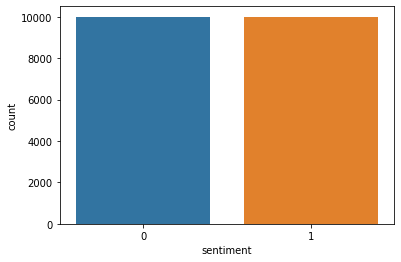

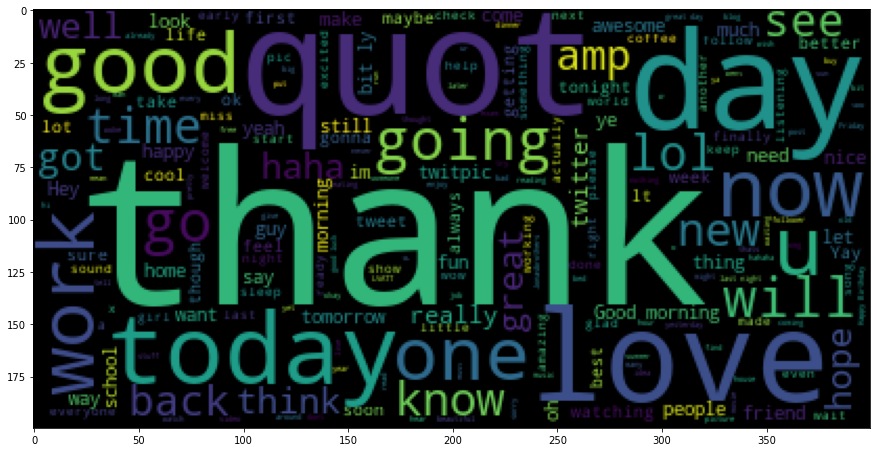

In [10]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

label_encoder = preprocessing.LabelEncoder()

columns = ["sentiment", "id", "date", "query", "user_id", "text"]
data = pd.read_csv("/content/drive/MyDrive/twitter/training.1600000.processed.noemoticon.csv", encoding="latin", names=columns)

data["sentiment"] = data["sentiment"].replace(4,1)

back = data.iloc[-10000:]
front=data.iloc[:10000]
data = pd.concat([front,back])

sns.countplot(x="sentiment", data=data)

positive_tweets = data[data['sentiment'] == 1]['text'].tolist()
positive_tweets_string = " ".join(positive_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(positive_tweets_string))

In [9]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

label_encoder = preprocessing.LabelEncoder()

columns = ["sentiment", "id", "date", "query", "user_id", "text"]
data = pd.read_csv("/content/drive/MyDrive/twitter/training.1600000.processed.noemoticon.csv", encoding="latin", names=columns)

data["sentiment"] = data["sentiment"].replace(4,1)

back = data.iloc[-10000:]
front=data.iloc[:10000]
data = pd.concat([front,back])

vectorizer = CountVectorizer()
features = vectorizer.fit_transform(data['text'])

labels = data['sentiment']
labels = label_encoder.fit_transform(labels)

trainF, testF, trainL, testL = train_test_split(features, labels, test_size=0.2, random_state=7)

model = MultinomialNB()
model.fit(trainF, trainL)

predicted = model.predict(testF)
print('Accuracy {}'.format(accuracy_score(testL, predicted)))
print('Precision {}'.format(precision_score(testL, predicted)))
print('Recall {}'.format(recall_score(testL, predicted)))

Accuracy 0.76175
Precision 0.8111849390919158
Recall 0.7053442465093885


In [11]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

label_encoder = preprocessing.LabelEncoder()

columns = ["sentiment", "id", "date", "query", "user_id", "text"]
data = pd.read_csv("/content/drive/MyDrive/twitter/training.1600000.processed.noemoticon.csv", encoding="latin", names=columns)

data["sentiment"] = data["sentiment"].replace(4,1)

back = data.iloc[-10000:]
front=data.iloc[:10000]
data = pd.concat([front,back])

vectorizer = CountVectorizer()
features = vectorizer.fit_transform(data['text'])

labels = data['sentiment']
labels = label_encoder.fit_transform(labels)

trainF, testF, trainL, testL = train_test_split(features, labels, test_size=0.2, random_state=7)

model = DecisionTreeClassifier()
model.fit(trainF, trainL)

predicted = model.predict(testF)
print('Accuracy {}'.format(accuracy_score(testL, predicted)))
print('Precision {}'.format(precision_score(testL, predicted)))
print('Recall {}'.format(recall_score(testL, predicted)))

Accuracy 0.68575
Precision 0.7077001013171226
Recall 0.672604718343765
